In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


**About The Dataset**

For our disease classification example, we have a dataset with 134 columns and 4920 rows. Each row corresponds to a unique case, and each column represents a different feature. The features are symptoms, and the target variable is the prognosis, indicating the predicted outcome or class for each case.

The 134 columns in our dataset represent different symptoms observed in patients. These symptoms could range from common indicators like fever and cough to more specific ones depending on the nature of the diseases under consideration. The features play a crucial role in the classification process as they are the input variables used by the algorithm to make predictions.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import joblib

In [69]:
df_train = pd.read_csv(r'C:\Users\jaid\OneDrive\Desktop\MPL\Training.csv')
df_test = pd.read_csv(r'C:\Users\jaid\OneDrive\Desktop\MPL\Testing.csv')

# **Train Dataset**

In [70]:
# Open the train dataset
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [72]:
# Checking if the Unnamed:133 is an empty column
df_train['Unnamed: 133'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4920 entries, 0 to 4919
Series name: Unnamed: 133
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 38.6 KB


The above result shows that Unnamed: 133 is total empty 

In [73]:
df_train.shape

(4920, 134)

In [74]:
df_train.drop('Unnamed: 133',axis = 1,inplace = True)

In [75]:
prognosis = df_train['prognosis'].unique()
prognosis

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [76]:
len(prognosis)

41

In [77]:
class_counts = df_train['prognosis'].value_counts()
class_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

# **Test Dataset**

In [78]:
# Open the test dataset
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [80]:
df_test.shape

(42, 133)

The analysis shows that the test dataset is very small just 42 row and 133 column compared to 4920 rows for the train dataset

# **Exploratory Data Analysis (EDA)**

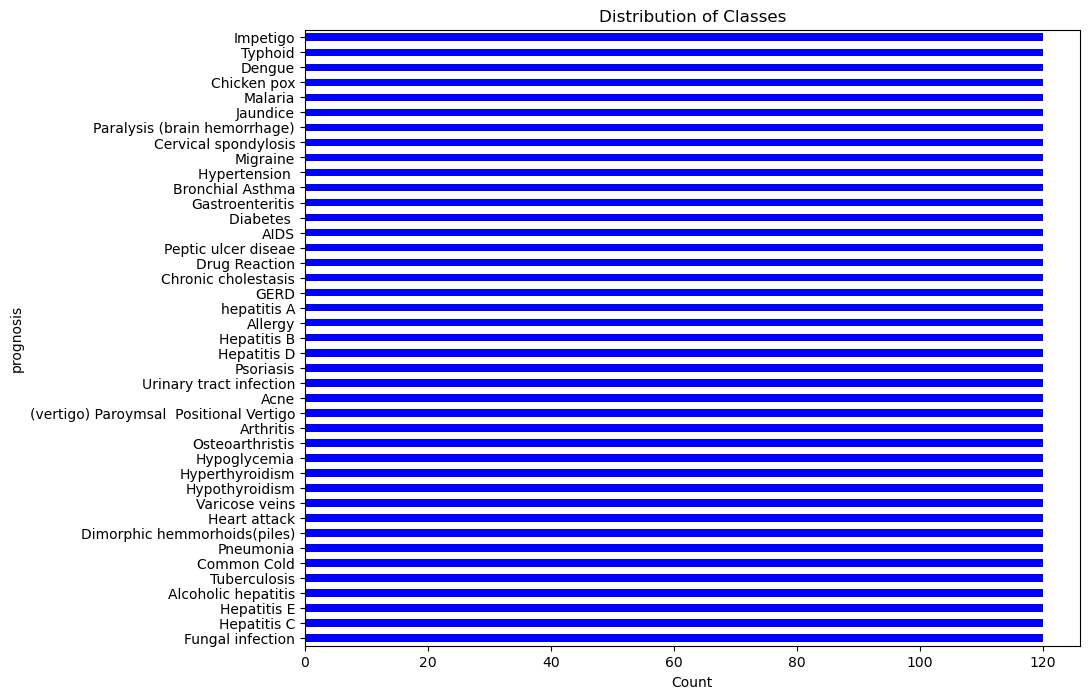

In [81]:
# Plot the class count
class_count = df_train['prognosis']

plt.figure(figsize = (10,8))
class_counts.plot(kind = 'barh',color = 'blue')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [82]:
# Encode the prognosis to number(this is earier for the model)
encoder = LabelEncoder()
df_train['diagnosis'] = encoder.fit_transform(df_train['prognosis'])

In [83]:
df_train['diagnosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [84]:
y = df_train['diagnosis']
x = df_train.drop(['prognosis','diagnosis'],axis=1)

In [85]:
classification_models = {
    'Random Forest': RandomForestClassifier(n_estimators= 7)
}

In [91]:
def train_model_and_evaluate(x,y,models):
    # Perform a split on the data for train and validation
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)
    
    # initalize an empty set to store result
    result_list = []
    
    for model_name,model in models.items():
        # Fit the model
        model.fit(x_train,y_train)
        
        # Predicit the training and valiadtion set
        y_train_pred = model.predict(x_train)
        y_valid_pred = model.predict(x_valid)
        
        
        # Check each predictions accuracy
        train_accuracy = accuracy_score(y_train,y_train_pred)
        vald_accuracy = accuracy_score(y_valid,y_valid_pred)
        
        # Save the result in the list
        result_list.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': vald_accuracy
        })
        
    # Create a Dataframe for the list of result
    result_df = pd.DataFrame(result_list)
        
    return result_df

In [92]:
%%time
result_df = train_model_and_evaluate(x,y,classification_models)

CPU times: total: 46.9 ms
Wall time: 50.2 ms


In [93]:
result_df

,Model,Training Accuracy,Validation Accuracy
0,Random Forest,1.0,1.0


# **TESTING**

In [94]:
# Encode the prognosis to number(this is earier for the model)
encoder = LabelEncoder()
df_test['diagnosis'] = encoder.fit_transform(df_test['prognosis'])

In [95]:
y2 = df_test['diagnosis']
x2 = df_test.drop(['diagnosis','prognosis'],axis = 1)

In [96]:
def test_model_and_evaluate(x,y,x1,y1,models):
    # Perform a split on the data for train and validation
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)
    
    # initalize an empty set to store result
    result_list = []
    
    for model_name,model in models.items():
        # Fit the model
        model.fit(x_train,y_train)
        
        # Predicit the testing set
        y_test_pred = model.predict(x1)
        
        
        # Check each predictions accuracy
        test_accuracy = accuracy_score(y1,y_test_pred)
        
        # Save the result in the list
        result_list.append({
            'Model': model_name,
            'Test Accuracy': test_accuracy 
        })
        
    # Create a Dataframe for the list of result
    result_df = pd.DataFrame(result_list)
        
    return result_df

In [97]:
%%time
result_df2 = test_model_and_evaluate(x,y,x2,y2,classification_models)

CPU times: total: 0 ns
Wall time: 45.8 ms


In [98]:
result_df2

,Model,Test Accuracy
0,Random Forest,0.97619


In [99]:
import joblib

In [100]:
joblib.dump(result_df2, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [102]:
# Load the model from the file
rf_model_loaded = joblib.load('random_forest_model.joblib')